In [279]:
data_main=r'C:\Users\Valued Customer\Desktop\ClinicalData\Patient12' # data_main needs to be patient level folder

In [280]:
#search for patient number
import re
m = re.search('Patient(.+)', data_main)
if m:
    PatientNo = m.group(1)

In [281]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from pylab import *
from PIL import Image

In [282]:
#loc=r'C:\Users\Valued Customer\Desktop\ClinicalData\Patient4\Diabetic_Ulcers\Study12\Post.L.Foot\ImageColl_2'
def output(loc):
    img1=mpimg.imread(loc+'\GrayRefer.tif')
    img2=mpimg.imread(loc+'\DeepviewOutput.tif')
    img3=mpimg.imread(loc+'\Features.tif')
    img4=mpimg.imread(loc+'\VP.tif')
    img5=mpimg.imread(loc+'\HRvote.tif')
    img6=mpimg.imread(loc+'\motion.jpeg')
#     img6=Image.open(loc+'\motion.jpeg')
#     img6.save(loc+'\motion.tiff')
#     img6=mpimg.imread(loc+'\motion.tiff')
    
    import matplotlib.gridspec as gs
    gr=gs.GridSpec(3,2)
    gr.update(wspace=0.01,hspace=0.01,left=0.01,right=0.01,bottom=0.01,top=0.01)
    
    f, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, sharex='col', sharey='row')
    ax1.imshow(img1,cmap='Greys_r')
    ax1.set_title('Gray refence image')
    ax2.imshow(img2)
    ax2.set_title('DeepView output')
    ax3.imshow(img3)
    ax3.set_title('Features')
    ax4.imshow(img4)
    ax4.set_title('Vessel probability')
    ax5.imshow(img5)
    ax5.set_title('HR votes')
    ax6.imshow(img6)
    ax6.set_title('motion')
    fig=matplotlib.pyplot.gcf()
    #fig.tight_layout()
    fig.set_size_inches(20,30)
    m = re.search('Patient(.+?)'+r'\\', loc)
    n = re.search('ImageColl_(.+)', loc)
    #if m:
    PatientNo = m.group(1)
    #if n:
    ImgCNo = n.group(1)
    plt.axis('tight')
    plt.suptitle('Patient'+PatientNo+'_ImgColl'+ImgCNo,fontsize=24)
    plt.savefig(loc+'\output.pdf',bbox_inches='tight')

In [283]:
import glob,os.path
filesDepth = glob.glob(data_main+'\*\*\*\*') # data_main needs to end with patient level folder
dirsDepth = filter(lambda f: os.path.isdir(f), filesDepth) # list all the folders at depth of ImgColl

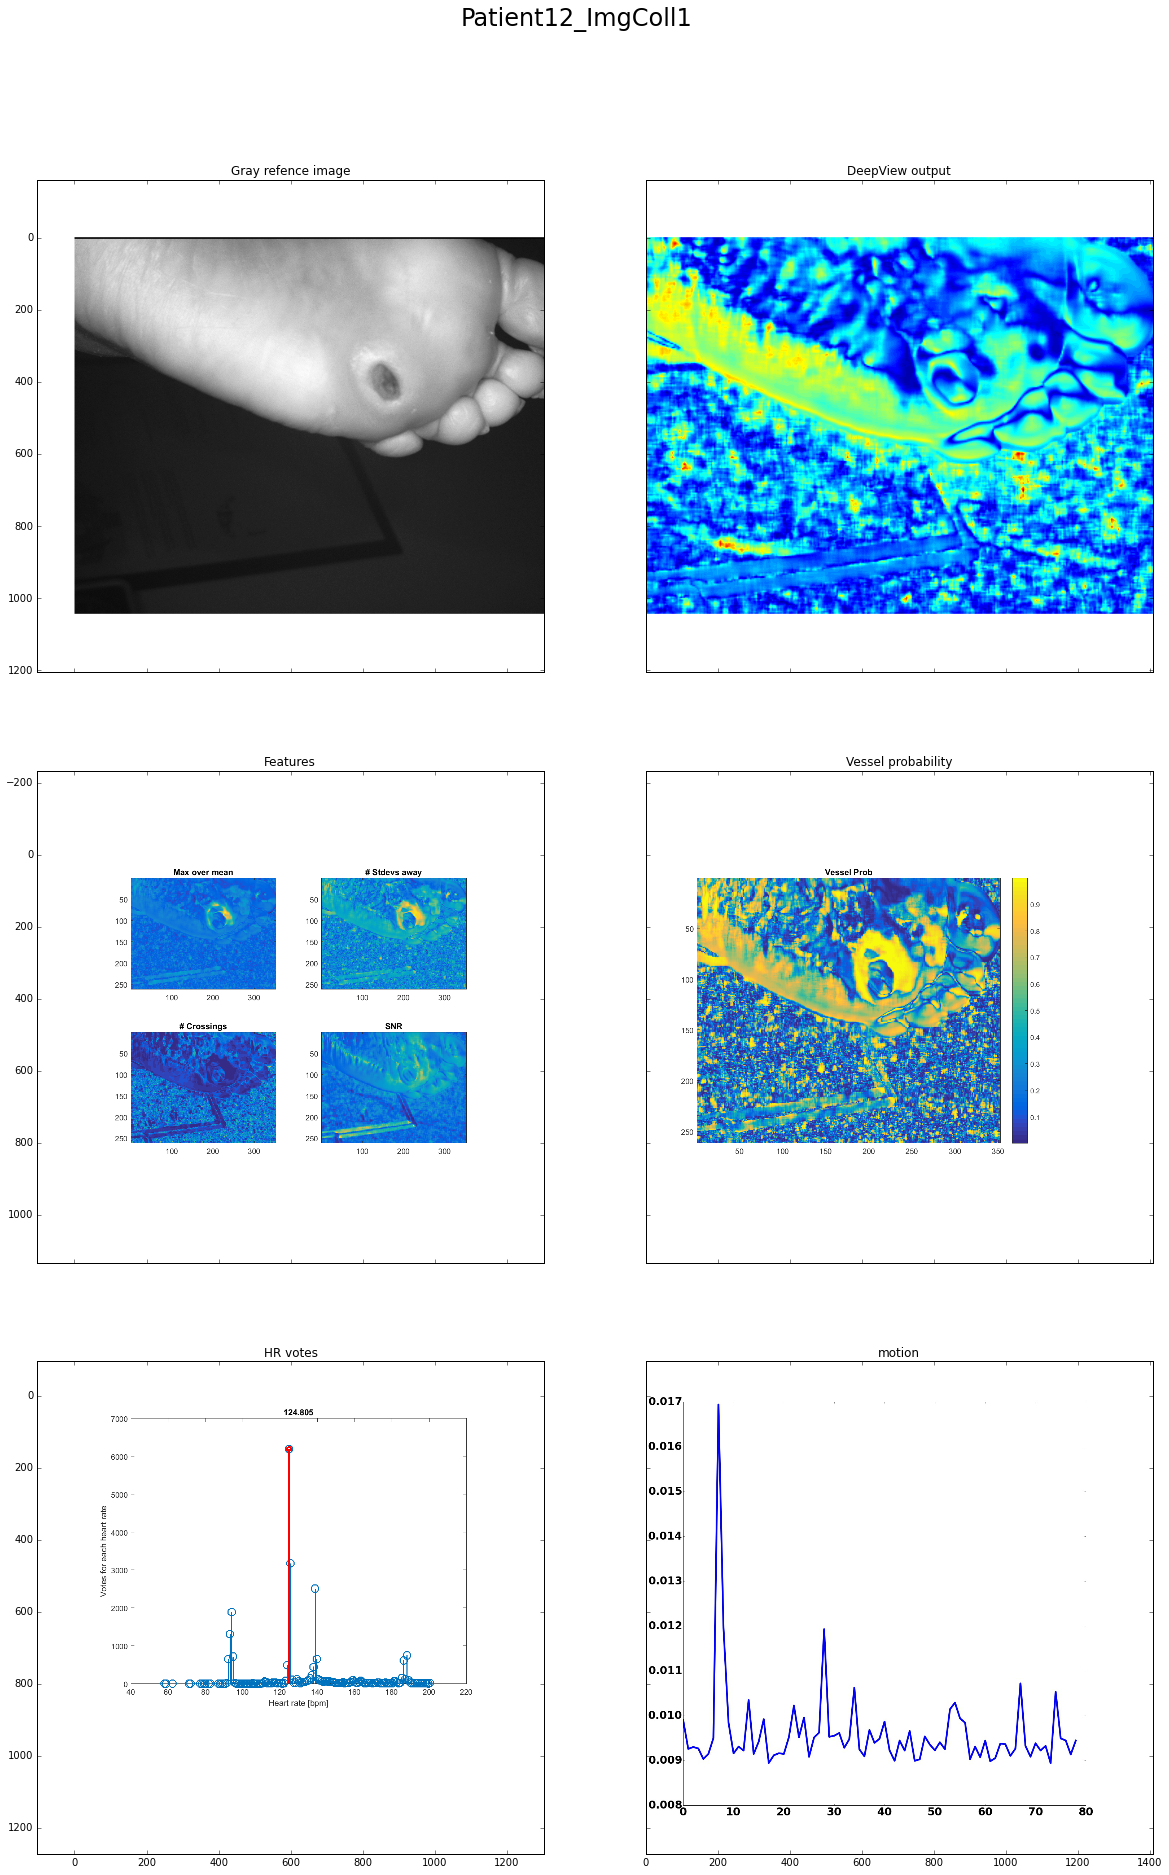

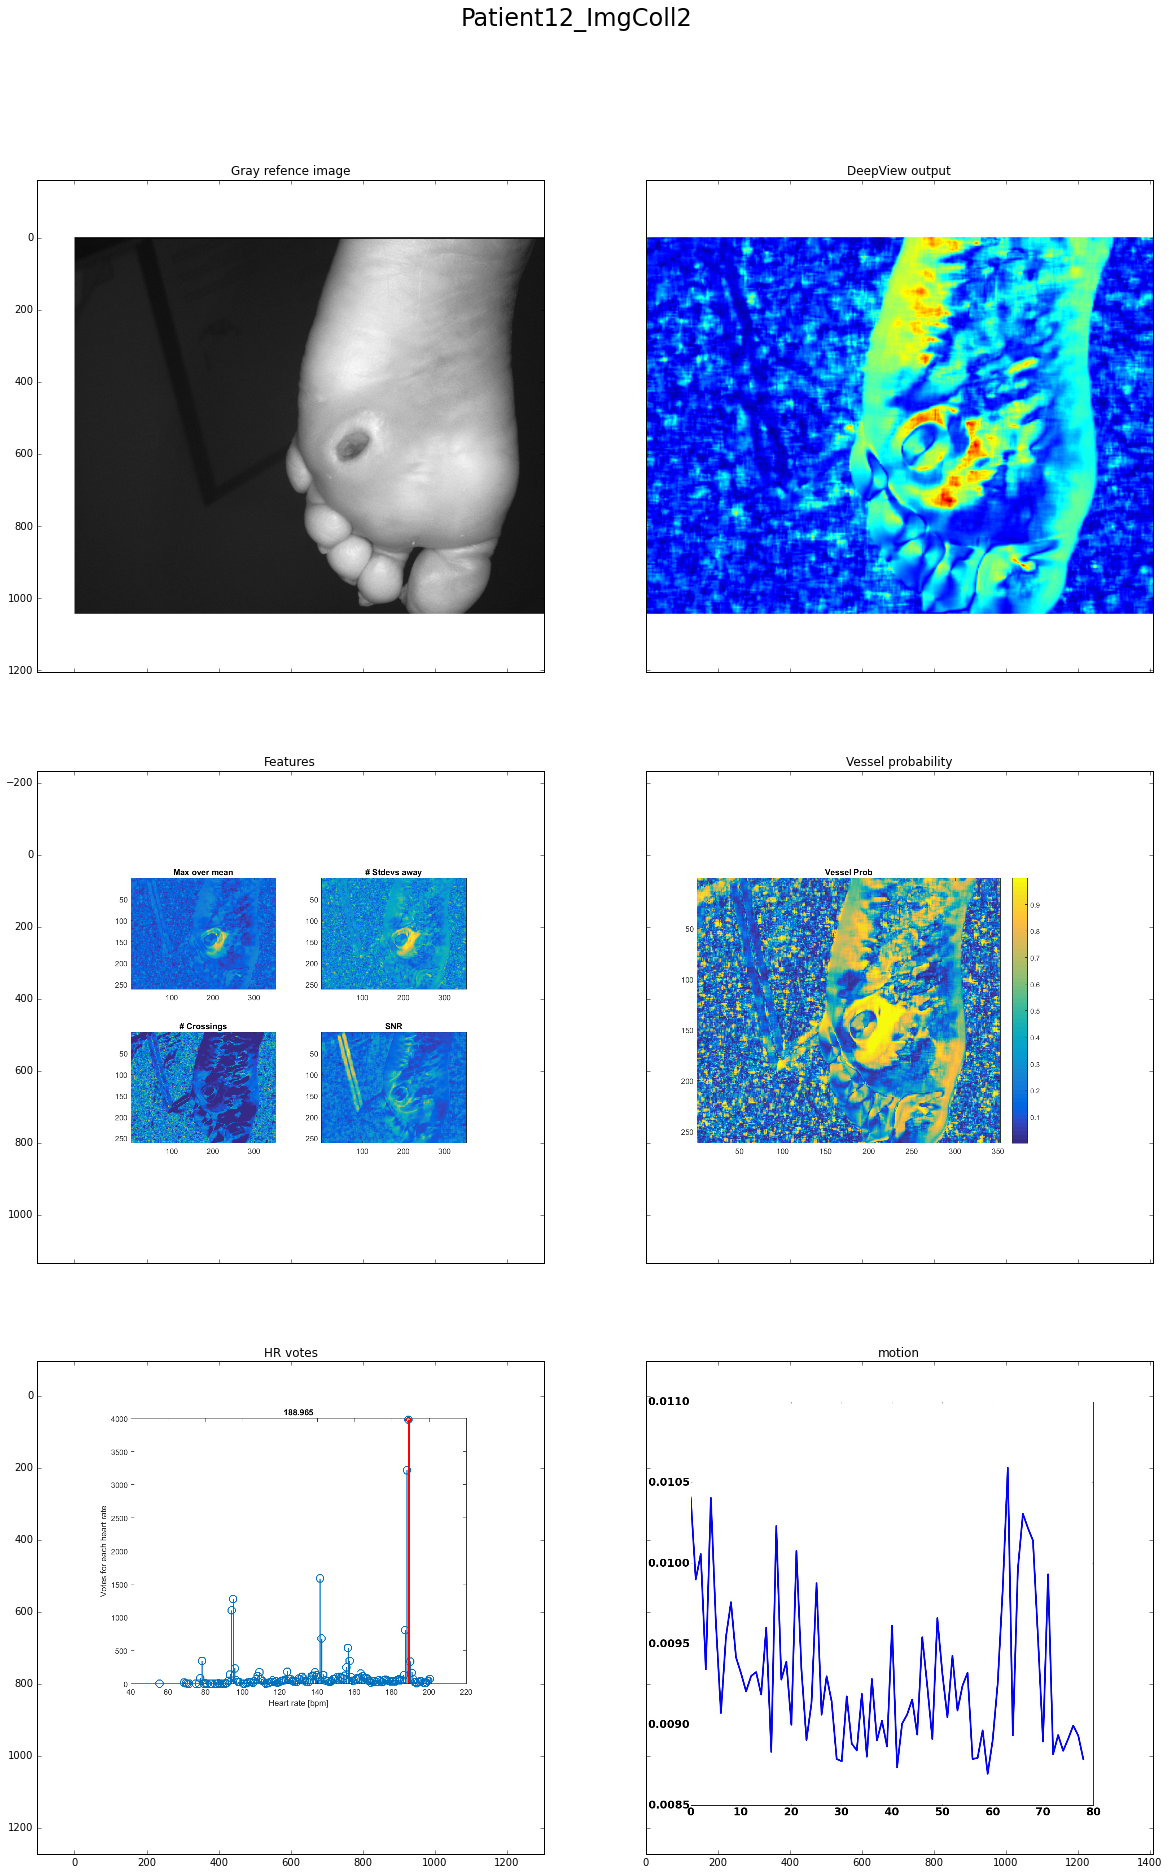

In [284]:
for fileloc in dirsDepth:
    output(fileloc)

In [285]:
# combine pdf outputs together
from PyPDF2 import PdfFileMerger, PdfFileReader

In [286]:
merger = PdfFileMerger()
for filename in dirsDepth:
    merger.append(PdfFileReader(file(filename+'\output.pdf', 'rb')))

merger.write(data_main+"\Patient"+PatientNo+".pdf")